In [ ]:

import pandas as pd
import numpy as np
from collections import Counter
from math import log
import math
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ROCAUC

In [ ]:
dataset = pd.read_csv("cancer.csv", header = 0)
AccDict={}

In [ ]:
dataset.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
dataset.shape

(1000, 26)

In [ ]:
dataset.count()

index                       1000
Patient Id                  1000
Age                         1000
Gender                      1000
Air Pollution               1000
Alcohol use                 1000
Dust Allergy                1000
OccuPational Hazards        1000
Genetic Risk                1000
chronic Lung Disease        1000
Balanced Diet               1000
Obesity                     1000
Smoking                     1000
Passive Smoker              1000
Chest Pain                  1000
Coughing of Blood           1000
Fatigue                     1000
Weight Loss                 1000
Shortness of Breath         1000
Wheezing                    1000
Swallowing Difficulty       1000
Clubbing of Finger Nails    1000
Frequent Cold               1000
Dry Cough                   1000
Snoring                     1000
Level                       1000
dtype: int64

Cheching unique values

In [ ]:
dataset.nunique()

index                       1000
Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

Checking Null values

In [ ]:
dataset.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Fortunately, there is no null value

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


In [ ]:
dataset.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

Droping unrealated columns

In [ ]:
dataset = dataset.drop(columns=['index', 'Patient Id'])


Chnaging the Level column's representation from catagorical to label

In [ ]:
labels,counts = pd.factorize(dataset['Level'])
dataset['Level'] = labels

In [ ]:
labels

array([0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
counts

Index(['Low', 'Medium', 'High'], dtype='object')

In [ ]:
dataset.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.827435


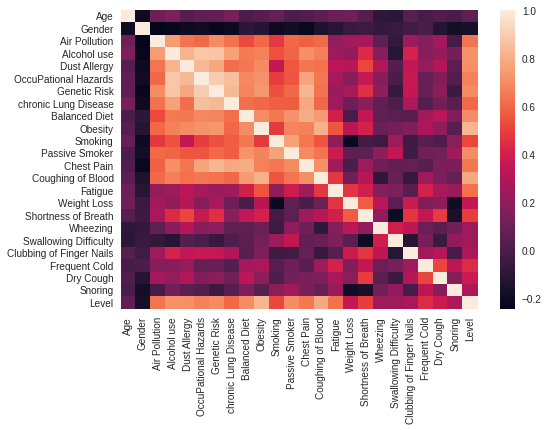

In [ ]:

dataplot = sns.heatmap(dataset.corr())

Scaling the data using Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dataset)

Splitting the data for prediction

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X

array([[33,  1,  2, ...,  2,  3,  4],
       [17,  1,  3, ...,  1,  7,  2],
       [35,  1,  4, ...,  6,  7,  2],
       ...,
       [25,  2,  4, ...,  6,  7,  2],
       [18,  2,  6, ...,  4,  2,  3],
       [47,  1,  6, ...,  6,  7,  2]])

In [ ]:
X[0]

array([33,  1,  2,  4,  5,  4,  3,  2,  2,  4,  3,  2,  2,  4,  3,  4,  2,
        2,  3,  1,  2,  3,  4])

In [ ]:
dataset.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


Splitting the data into 25% for test and 75% for training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Apllying the Support vector Classification algorithm , max iteration set to 1000

In [ ]:
svc = SVC(max_iter=1000,random_state=0,kernel='poly')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
SVC = accuracy_score(pred_svc,y_test)*100
sv = {'SVC':SVC}
AccDict.update(sv)
print(SVC)

94.8


cross validation using kfold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True , random_state=10) 
score = cross_val_score(svc, X, y, cv=kfold, scoring='accuracy').mean()
print(score)

0.942


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


classification report to see how the algorithm working

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_svc) 

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        66
           1       0.90      0.94      0.92        80
           2       1.00      1.00      1.00       104

    accuracy                           0.95       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.95      0.95      0.95       250



Visualising the confusion matrix

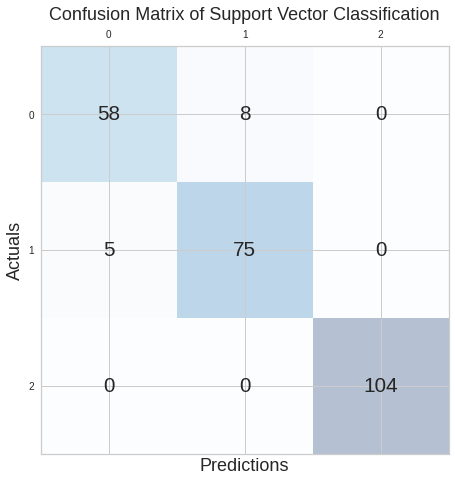

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_svc)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Support Vector Classification', fontsize=18)
plt.show()

Visuakizing the ROC curve

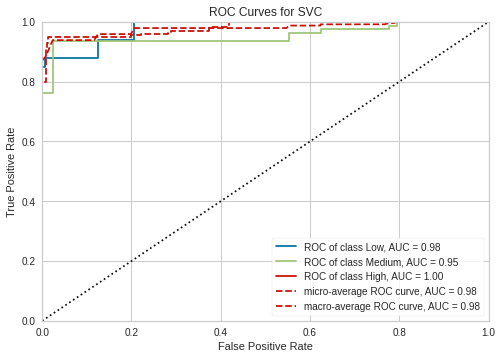

In [ ]:
visualizer = ROCAUC(svc, classes=["Low", "Medium", "High"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test)        
visualizer.show()   

In [ ]:
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt = dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
dta = accuracy_score(pred_dt,y_test)*100
dt1 = {'DecisionTree':dta}
AccDict.update(dt1)
print(dta)


83.2


In [ ]:
kfold = KFold(n_splits=10, shuffle=True , random_state=10) 
score = cross_val_score(dt, X, y, cv=kfold, scoring='accuracy').mean()
print(score)

0.867


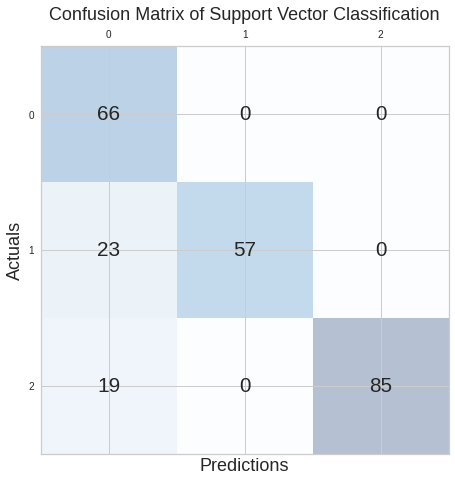

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_dt)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Support Vector Classification', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        66
           1       1.00      0.71      0.83        80
           2       1.00      0.82      0.90       104

    accuracy                           0.83       250
   macro avg       0.87      0.84      0.83       250
weighted avg       0.90      0.83      0.84       250



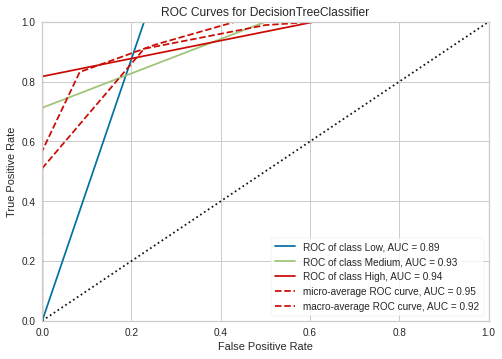

In [ ]:
visualizer = ROCAUC(dt, classes=["Low", "Medium", "High"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test)        
visualizer.show()   

In [ ]:
#model = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=5, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)
pred = adaboost.predict(x_test)
ada = accuracy_score(y_test,pred)*100
print(ada)
ad = {'adaboost':ada}
AccDict.update(ad)

96.39999999999999


In [ ]:
kfold = KFold(n_splits=10, shuffle=True , random_state=10) 
score = cross_val_score(adaboost, X, y, cv=kfold, scoring='accuracy').mean()
print(score)

0.975


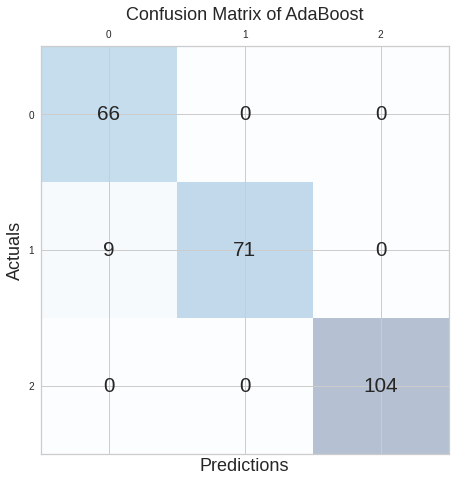

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of AdaBoost', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        66
           1       1.00      0.89      0.94        80
           2       1.00      1.00      1.00       104

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.97      0.96      0.96       250



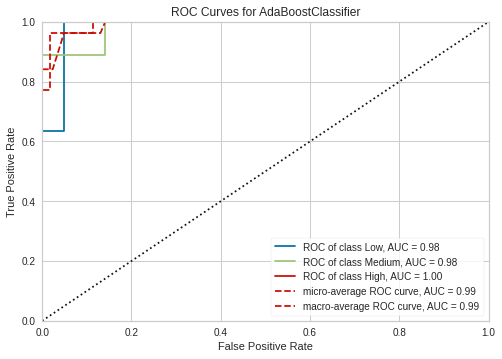

In [ ]:
visualizer = ROCAUC(adaboost, classes=["Low", "Medium", "High"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test)        
visualizer.show()   

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
KNN = accuracy_score(pred_knn,y_test)*100
ki = {'KNN before':KNN}
AccDict.update(ki)
print(KNN)


92.4


In [ ]:
kfold = KFold(n_splits=10, shuffle=True , random_state=10) 
score = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy').mean()
print(score)

0.922


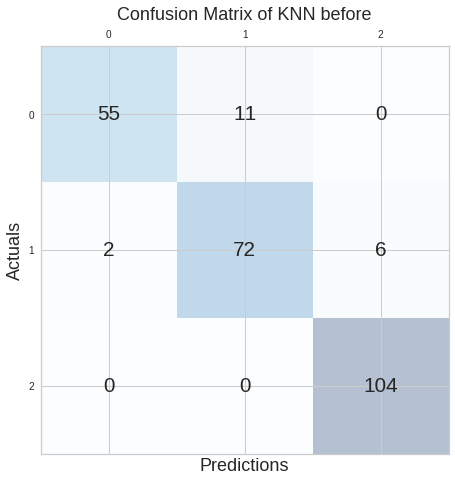

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_knn)
conf_matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN before', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        66
           1       0.87      0.90      0.88        80
           2       0.95      1.00      0.97       104

    accuracy                           0.92       250
   macro avg       0.93      0.91      0.92       250
weighted avg       0.93      0.92      0.92       250



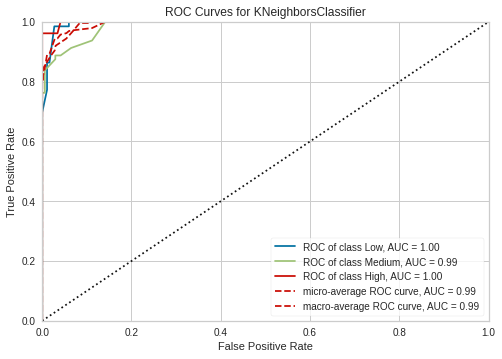

In [ ]:
visualizer = ROCAUC(knn, classes=["Low", "Medium", "High"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test)        
visualizer.show()   

Text(0, 0.5, 'error rate')

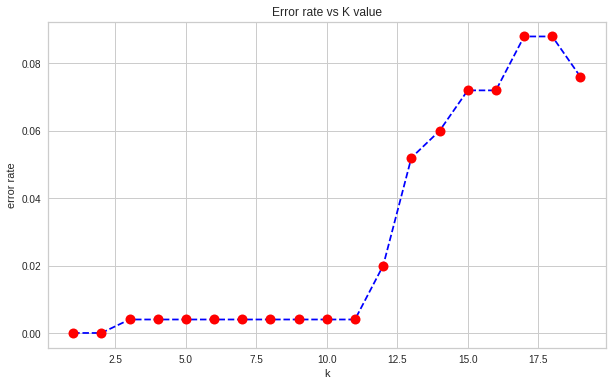

In [ ]:
error=[]
v = 20
for i in range(1,v):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,v),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=4)
knn2.fit(x_train,y_train)
pred_knn2 = knn2.predict(x_test)
KNN2 = accuracy_score(pred_knn2,y_test)*100
ki2 = {'KNN after':KNN2}
AccDict.update(ki2)
print(KNN2)


99.6


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.99      1.00      0.99        80
           2       1.00      1.00      1.00       104

    accuracy                           1.00       250
   macro avg       1.00      0.99      1.00       250
weighted avg       1.00      1.00      1.00       250



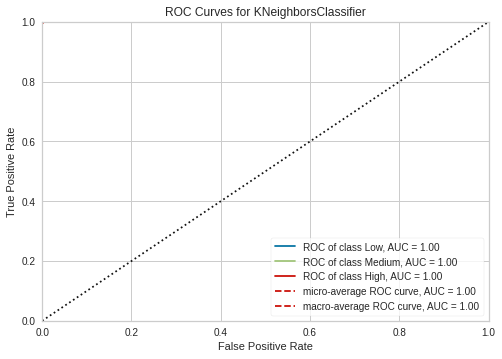

In [ ]:
visualizer = ROCAUC(knn2, classes=["Low", "Medium", "High"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test)        
visualizer.show()   

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)
GNB = accuracy_score(pred_gnb,y_test)*100
gb = {'Naive Bayes':GNB}
AccDict.update(gb)
print(GNB)

88.8


In [ ]:
kfold = KFold(n_splits=10, shuffle=True , random_state=10) 
score = cross_val_score(gnb, X, y, cv=kfold, scoring='accuracy').mean()
print(score)

0.891


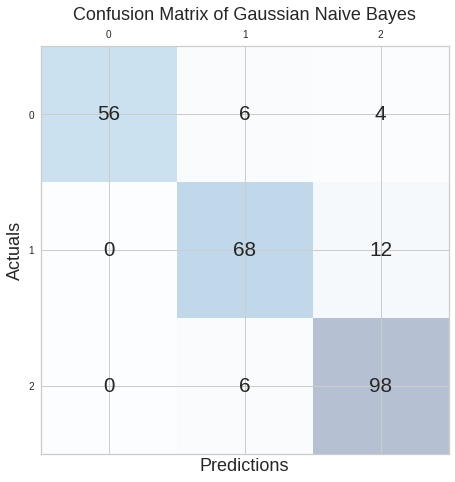

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_gnb)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Gaussian Naive Bayes', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        66
           1       0.85      0.85      0.85        80
           2       0.86      0.94      0.90       104

    accuracy                           0.89       250
   macro avg       0.90      0.88      0.89       250
weighted avg       0.89      0.89      0.89       250



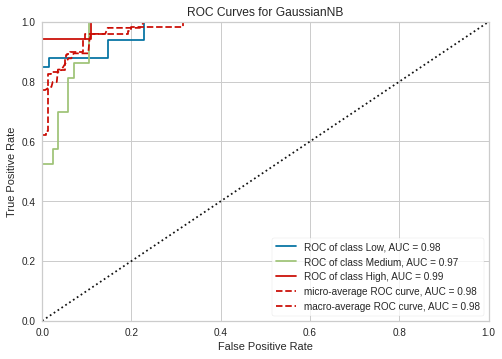

In [ ]:
visualizer = ROCAUC(gnb, classes=["Low", "Medium", "High"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test)        
visualizer.show()   

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')
lda.fit(x_train,y_train)
pred_lda = lda.predict(x_test)
LDA = accuracy_score(pred_lda,y_test)*100
ld = {'LDA':LDA}
AccDict.update(ld)
print(LDA)

96.8


In [ ]:
kfold = KFold(n_splits=10, shuffle=True , random_state=10) 
score = cross_val_score(lda, X, y, cv=kfold, scoring='accuracy').mean()
print(score)

0.966


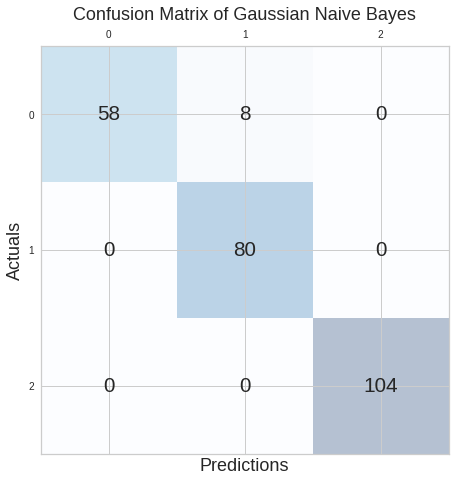

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_lda)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Gaussian Naive Bayes', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lda))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        66
           1       0.91      1.00      0.95        80
           2       1.00      1.00      1.00       104

    accuracy                           0.97       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.97      0.97      0.97       250



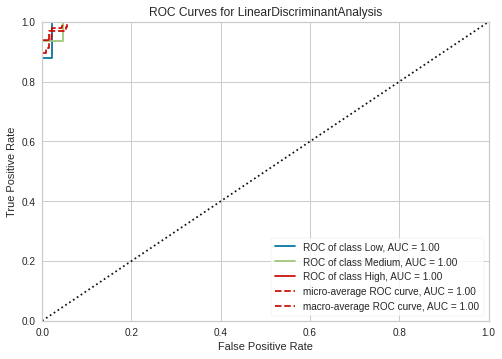

In [ ]:
visualizer = ROCAUC(lda, classes=["Low", "Medium", "High"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test)        
visualizer.show()   

In [ ]:
logistic_Regression = LogisticRegression(solver="sag", max_iter=100, random_state=42, penalty='l2')
logistic_Regression.fit(x_train,y_train)
y_pred = logistic_Regression.predict(x_test)
log = accuracy_score(y_pred,y_test)*100
li = {'Logistic Regression':log}
AccDict.update(li)
print(log)

99.2


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


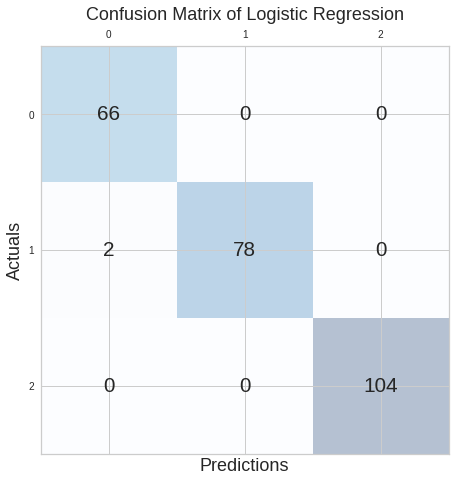

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.97      0.99        80
           2       1.00      1.00      1.00       104

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



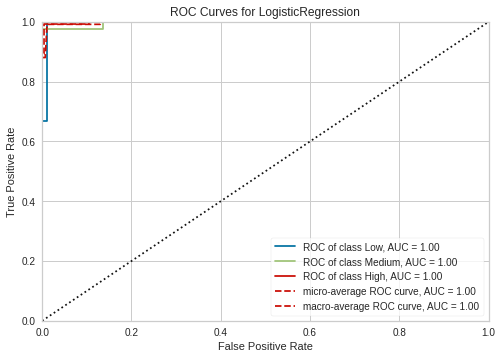

In [ ]:
visualizer = ROCAUC(logistic_Regression, classes=["Low", "Medium", "High"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test)        
visualizer.show()   

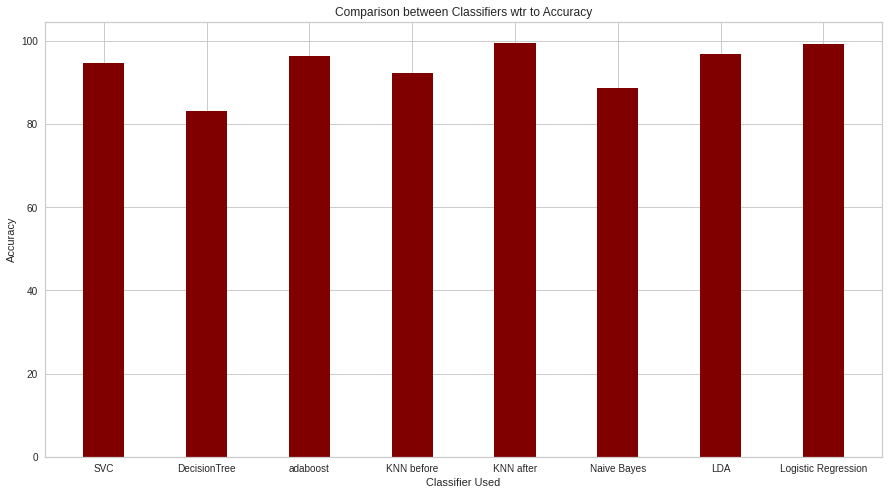

In [ ]:
Classifier = list(AccDict.keys())
Accuracy = list(AccDict.values())
  
fig = plt.figure(figsize = (15, 8))
 
plt.bar(Classifier, Accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifier Used")
plt.ylabel("Accuracy")
plt.title("Comparison between Classifiers wtr to Accuracy")
plt.show()